# Preparativos

Primero cargamos los datos y los guardamos en una variable secundaria, cosa que no tengamos que volverlos a cargar

In [1]:
import pandas as pd
import numpy as np
import datetime
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os.path as path

In [2]:
camino_tender_2018 = path.join("Datos y trabajo con muestras",'tenderers_2018.xlsx')
df_tenderer_2018 = pd.read_excel(camino_tender_2018)
camino_tenderer_2021 = path.join("Datos y trabajo con muestras",'tenderers_2021.xlsx')
df_tenderer_2021 = pd.read_excel(camino_tenderer_2021)


In [3]:
camino_award_2018 = path.join("Datos y trabajo con muestras",'awards_2018.xlsx')
df_award_2018 =pd.read_excel(camino_award_2018)
camino_award_2021 = path.join("Datos y trabajo con muestras",'awards_2021.xlsx')
df_award_2021 = pd.read_excel(camino_award_2021)

In [4]:
df_award_2018["procurementMethod"] =df_award_2018["procurementMethod"].astype("category")
df_award_2018["tender_status"] =df_award_2018["tender_status"].astype("category")
df_award_2018["initiationType"] =df_award_2018["initiationType"].astype("category")
df_award_2018["buyer_region"] =df_award_2018["buyer_region"].astype("category")

In [5]:
df_award_2021.drop(columns=["_link_y", "_link_main_x"], inplace=True)

In [6]:
df_award_2021["procurementMethod"] =df_award_2021["procurementMethod"].astype("category")
df_award_2021["tender_status"] =df_award_2021["tender_status"].astype("category")
df_award_2021["initiationType"] =df_award_2021["initiationType"].astype("category")
df_award_2021["buyer_region"] =df_award_2021["buyer_region"].astype("category")

In [7]:
df_tenderer_2018["procurementMethod"] =df_tenderer_2018["procurementMethod"].astype("category")
df_tenderer_2018["sector"] =df_tenderer_2018["sector"].astype("category")
df_tenderer_2018["tender_status"] =df_tenderer_2018["tender_status"].astype("category")
df_tenderer_2018["procurement_details"] =df_tenderer_2018["procurement_details"].astype("category")
df_tenderer_2018["initiationType"] =df_tenderer_2018["initiationType"].astype("category")

In [8]:
df_tenderer_2021["procurementMethod"] =df_tenderer_2021["procurementMethod"].astype("category")
df_tenderer_2021["sector"] =df_tenderer_2021["sector"].astype("category")
df_tenderer_2021["tender_status"] =df_tenderer_2021["tender_status"].astype("category")
df_tenderer_2021["procurement_details"] =df_tenderer_2021["procurement_details"].astype("category")
df_tenderer_2021["initiationType"] =df_tenderer_2021["initiationType"].astype("category")

In [9]:
award_2018 =df_award_2018
award_2021 = df_award_2021
tenderer_2018 = df_tenderer_2018
tenderer_2021 = df_tenderer_2021

# Preguntas

1.- ¿Existe una correlación entre el monto adjudicado y el tipo de procedimiento de licitación utilizado?

2.- ¿Hay factores que afectan la cantidad de oferentes en una licitación?, ¿Cuáles son?

3.- ¿Qué tipo de servicio estatal tiene mejor respuesta del mercado frente a sus licitaciones?

4.- ¿Qué áreas estatal muestran similitudes en cuanto a montos y cantidad de ofertas que reciben las licitaciones que realizan?

5.- ¿Cómo se distribuyen geográficamente las contrataciones públicas según el tipo de licitación?

### Primera pregunta.

Para responder esta pregunta se debe usarán los dataframes awards, la columna "procurementMethod" como tipo de procedimiento de licitación, no se utilizará "procurement_details" puesto que esta columna tiene una directa relación con el monto adjudicado, como monto se utilizará "value_amount" de las licitaciones en CLP, para ver si existe una relción entre ambos valores se procederá a realizar pairplots.

In [10]:
df_p1_2018 = award_2018[["procurementMethod", "value_amount", "value_monetary_unit"]]
df_p1_2018 = df_p1_2018.loc[df_p1_2018["value_monetary_unit"] == "CLP"]
df_p1_2018.dropna(inplace=True)
dummy_2018 = pd.get_dummies(df_p1_2018["procurementMethod"])
dummy_2018 = dummy_2018.map(lambda x: 0 if x == True else 1)
df_p1_2018 = pd.concat([df_p1_2018, dummy_2018], axis=1)
df_p1_2018["value_amount"] = df_p1_2018["value_amount"].map(lambda x: round(x))
df_p1_2018.drop(columns=["value_monetary_unit"], inplace=True)

In [11]:
df_p1_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19709 entries, 0 to 24742
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   procurementMethod  19709 non-null  category
 1   value_amount       19709 non-null  int64   
 2   open               19709 non-null  int64   
 3   selective          19709 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 635.3 KB


In [12]:
promedio_18 = df_p1_2018["open"].mean()
covarianza_18 = df_p1_2018["value_amount"].cov(df_p1_2018["open"])

In [13]:
df_p1_2018["value_norm"] = (df_p1_2018["value_amount"] - promedio_18)/covarianza_18

<Axes: xlabel='value_norm', ylabel='open'>

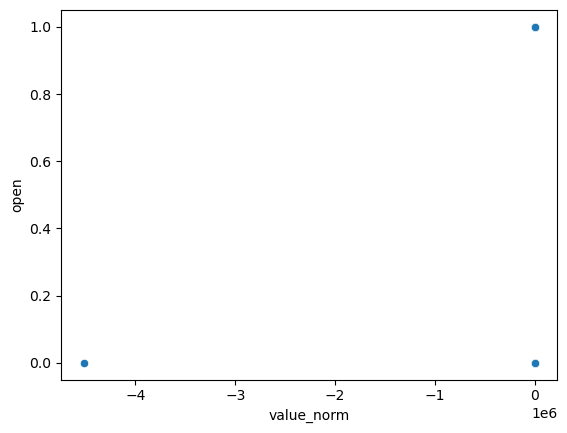

In [14]:
sns.scatterplot(df_p1_2018, y="open", x="value_norm")

<Axes: >

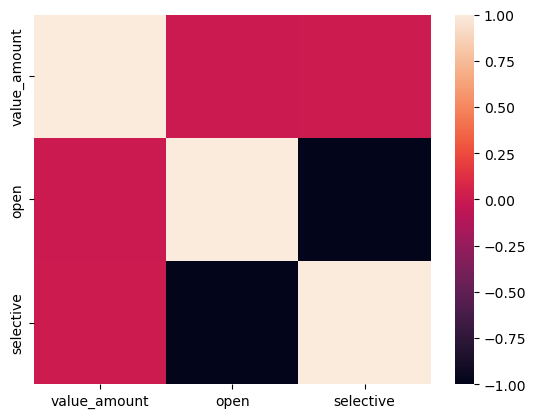

In [15]:
correlacion_18 = df_p1_2018[["value_amount","open", "selective"]].corr()
sns.heatmap(correlacion_18)

In [16]:
df_p1_2021 = award_2021[["procurementMethod", "value_amount", "value_monetary_unit"]]
df_p1_2021 = df_p1_2021.loc[df_p1_2021["value_monetary_unit"] == "CLP"]
df_p1_2021 = df_p1_2021.dropna(subset=["value_amount"])
dummy_2021 = pd.get_dummies(df_p1_2021["procurementMethod"])
dummy_2021 = dummy_2021.map(lambda x: 0 if x == True else 1)
df_p1_2021 = pd.concat([df_p1_2021, dummy_2021], axis=1)
df_p1_2021["value_amount"] = df_p1_2021["value_amount"].map(lambda x: round(x))
df_p1_2021.drop(columns=["value_monetary_unit"], inplace=True)

In [17]:
promedio_21 = df_p1_2021["open"].mean()
covarianza_21 = df_p1_2021["value_amount"].cov(df_p1_2021["open"])

In [18]:
df_p1_2021["value_norm"] = (df_p1_2021["value_amount"] - promedio_21)/covarianza_21

<Axes: xlabel='value_norm', ylabel='open'>

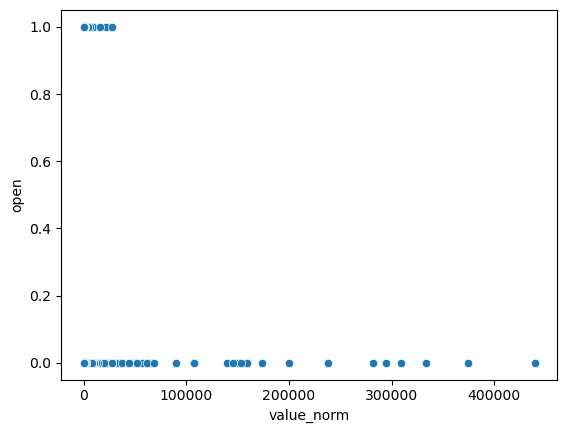

In [19]:
sns.scatterplot(df_p1_2021, y="open", x="value_norm")

<Axes: >

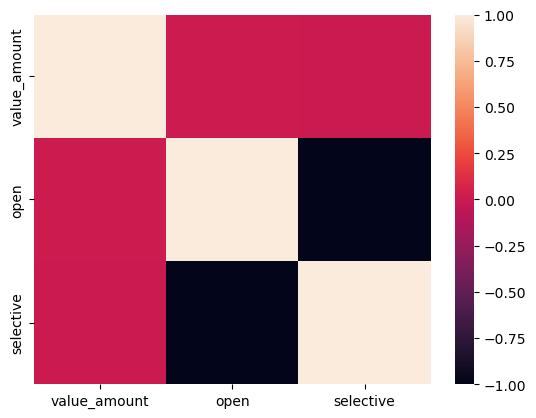

In [20]:
correlacion_21 = df_p1_2021[["value_amount","open", "selective"]].corr()
sns.heatmap(correlacion_21)

##### Respuesta: No parece existir relación entre la cantidad de dinero adjudicado y el metodo de licitación usado, puesto que no se observa un comportamiento claro de una variable respecto a la otro en los scatterplots, ni se observa una correlación cercana a 1 o a -1 en el heatmap, para nminguno de los años.

### Segunda pregunta

Para responder a esta pregunta haremos un pair plot para cada variable de los dataframes awards y tenderers, exceptuando las que están relacionadas con que hayan tenderers, las columnas comunes entre los dataframe que se utilizarán solo una vez, las columnas identificatorias, las de items y las que están relacionadas entre si (se dejará una, la causa), y observaremos si hay alguna relación tentativa, en base a estas observaciones crearemos una matríz de correlación que graficaremos en un heatmap y teniendo esta información intentaremos plantear un predictor de duración de licitaciones.

#### 2018

In [21]:
award_2018.columns

Index(['_link_x', 'initiationType', 'tender_id', 'procurement_details',
       'tender_status', 'procurementMethod', 'tender_hasEnquiries',
       'tender_awardPeriod_endDate', 'tender_awardPeriod_startDate',
       'tender_awardPeriod_durationInDays', 'tender_tenderPeriod_endDate',
       'tender_tenderPeriod_startDate', 'tender_tenderPeriod_durationInDays',
       'tender_enquiryPeriod_endDate', 'tender_enquiryPeriod_startDate',
       'tender_enquiryPeriod_durationInDays', 'estimated_cost',
       'estimated_cost_monetary_unit', 'buyer_id', 'buyer_name',
       'buyer_region', 'identifier_id', 'buyer_legalName', 'sector',
       'Codigo Unidad de Compra', 'Unidad de Compra', '_link_y',
       '_link_main_x', 'date', 'status', 'value_amount', 'value_monetary_unit',
       'id', 'quantity', 'unit_name', 'unit_value_amount', 'classification_id',
       'unit_value_monetary_unit', 'Nombre Segmento', 'Código Producto',
       'Nombre Producto'],
      dtype='object')

In [22]:
df_cant_tenderers_18 = df_tenderer_2018.groupby("tender_id").agg({"Has_tender":"sum"}).reset_index()
df_cant_tenderers_18

,tender_id,Has_tender
0,1000-48-LE17,1
1,1000-52-LQ17,0
2,1000-54-LE17,4
3,1000-55-LE17,3
4,1000-56-LE17,2
...,...,...
11470,998-89-LE17,5
11471,998-91-LE17,4
11472,998-95-LP17,0
11473,998-97-LP17,1


In [23]:
df__2018 = award_2018[['initiationType', 'tender_id', 'procurement_details','tender_tenderPeriod_endDate','tender_tenderPeriod_startDate','procurementMethod', 'estimated_cost','estimated_cost_monetary_unit', 'sector','value_amount']]

In [24]:
dic_regiones ={'Región de Valparaíso ': 5,'Región del Biobío ':8, 'Región Metropolitana de Santiago':13,'Región de los Lagos ':10,'Región de Arica y Parinacota':15,'Región de Magallanes y de la Antártica':12, 'Región del Maule ':7,'Región de Los Ríos':14,'Región de la Araucanía ':9,'Región del Libertador General Bernardo O´Higgins':6,'Región de Atacama ':3,'Región de Tarapacá  ':1,'Región Aysén del General Carlos Ibáñez del Campo':11,
                           'Región de Antofagasta ':2,'Región de Coquimbo ':4}

In [25]:
df__2018 = df__2018.loc[df__2018["estimated_cost_monetary_unit"] =="CLP"]

In [26]:
df__2018["numero_region"] = award_2018["buyer_region"].map(dic_regiones)

In [27]:
dummy_2018 = pd.get_dummies(df__2018["procurementMethod"])
dummy_2018= dummy_2018.map(lambda x: 0 if x == True else 1)
df__2018 = pd.concat([df__2018, dummy_2018], axis=1)

In [28]:
df__2018

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective
1,tender,2409-1129-L117,L1,2017-12-26 15:30:00,2017-12-18 17:58:24,open,300000.0,CLP,MUNICIPALIDADES,NaN,8,0,1
2,tender,2961-811-L117,L1,2018-01-02 17:00:00,2017-12-19 13:02:43,open,1452000.0,CLP,MUNICIPALIDADES,870000.0,13,0,1
3,tender,4858-195-L117,L1,2017-12-21 10:02:00,2017-12-15 12:23:25,open,900000.0,CLP,MUNICIPALIDADES,NaN,8,0,1
4,tender,2409-975-LE17,LE,2017-12-11 16:00:00,2017-12-05 17:11:36,open,6000000.0,CLP,MUNICIPALIDADES,6000000.0,8,0,1
12,tender,2098-173-LE17,LE,2017-12-26 15:31:00,2017-12-19 15:56:25,open,16558612.0,CLP,SALUD,12219604.0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24714,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24715,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24716,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24718,tender,2583-726-L117,L1,2017-11-29 15:01:00,2017-11-21 16:44:00,open,4460000.0,CLP,MUNICIPALIDADES,3723000.0,13,0,1


In [29]:
df__2018["mes_comiezo"] = df__2018["tender_tenderPeriod_startDate"].map(lambda x: x.month)
df__2018["dia_comiezo"] = df__2018["tender_tenderPeriod_startDate"].map(lambda x: x.day)
df__2018["mes_fin"] = df__2018["tender_tenderPeriod_endDate"].map(lambda x: x.month)
df__2018["mes_fin"] = df__2018["tender_tenderPeriod_endDate"].map(lambda x: x.day)

In [30]:
df__2018 = df__2018.merge(df_cant_tenderers_18, on="tender_id")

In [31]:
df__2018.drop_duplicates(keep="first", inplace=True)

In [32]:
df__2018["tender_id"].count()

5089

In [33]:
df__2018["sector"].unique()

array(['MUNICIPALIDADES', 'SALUD', 'GOB. CENTRAL, UNIVERSIDADES', 'FFAA',
       'OBRAS P�BLICAS', 'LEGISLATIVO Y JUDICIAL'], dtype=object)

In [34]:
df__2018["sector"] = df__2018["sector"].map({'MUNICIPALIDADES':1, 'SALUD':3, 'GOB. CENTRAL':4, 'UNIVERSIDADES':5, 'FFAA':6,'OBRAS P�BLICAS':7, 'LEGISLATIVO Y JUDICIAL':8, 'OTROS':10})

In [35]:
df__2018["procurement_details"].unique()

array(['L1', 'LE', 'LP', 'LR', 'LQ', nan, 'H2', 'B2', 'LS'], dtype=object)

In [36]:
dic_procurement = {'L1':0, 'LE':1, 'LP':2, 'LR':3, 'LQ':4,'B2':5, 'H2':6, 'LS':7}

In [37]:
df__2018["procurement_details"] = df__2018["procurement_details"].map(dic_procurement)

In [38]:
df__2018.head()

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective,mes_comiezo,dia_comiezo,mes_fin,Has_tender
0,tender,2409-1129-L117,0.0,2017-12-26 15:30:00,2017-12-18 17:58:24,open,300000.0,CLP,1.0,NaN,8,0,1,12,18,26,0
1,tender,2961-811-L117,0.0,2018-01-02 17:00:00,2017-12-19 13:02:43,open,1452000.0,CLP,1.0,870000.0,13,0,1,12,19,2,4
2,tender,4858-195-L117,0.0,2017-12-21 10:02:00,2017-12-15 12:23:25,open,900000.0,CLP,1.0,NaN,8,0,1,12,15,21,1
3,tender,2409-975-LE17,1.0,2017-12-11 16:00:00,2017-12-05 17:11:36,open,6000000.0,CLP,1.0,6000000.0,8,0,1,12,5,11,1
4,tender,2098-173-LE17,1.0,2017-12-26 15:31:00,2017-12-19 15:56:25,open,16558612.0,CLP,3.0,12219604.0,8,0,1,12,19,26,15


In [39]:
df__2018.drop(columns=['tender_tenderPeriod_endDate','tender_tenderPeriod_startDate', "tender_id", "initiationType","estimated_cost_monetary_unit","procurementMethod", "initiationType"], inplace=True)

#### 2021

In [40]:
award_2021.columns

Index(['_link_x', 'tender_id', 'initiationType', 'tender_id.1',
       'procurement_details', 'tender_status', 'procurementMethod',
       'tender_hasEnquiries', 'tender_awardPeriod_endDate',
       'tender_awardPeriod_startDate', 'tender_awardPeriod_durationInDays',
       'tender_tenderPeriod_endDate', 'tender_tenderPeriod_startDate',
       'tender_tenderPeriod_durationInDays', 'tender_enquiryPeriod_endDate',
       'tender_enquiryPeriod_startDate', 'tender_enquiryPeriod_durationInDays',
       'estimated_cost', 'buyer_name', 'estimated_cost_monetary_unit',
       'buyer_id', 'buyer_name.1', 'buyer_region', 'identifier_id',
       'buyer_legalName', 'sector', 'Codigo Unidad de Compra',
       'Unidad de Compra', 'date', 'status', 'value_amount',
       'value_monetary_unit', 'id', 'quantity', 'unit_name',
       'unit_value_amount', 'classification_id', 'unit_value_monetary_unit',
       'Nombre Segmento', 'Código Producto', 'Nombre Producto'],
      dtype='object')

In [41]:
df_cant_tenderers_21 = df_tenderer_2021.groupby("tender_id").agg({"Has_tender":"sum"}).reset_index()
df_cant_tenderers_21

,tender_id,Has_tender
0,ocds-70d2nz-1000-35-CO21-2021-11-23T15:09:24Z,2
1,ocds-70d2nz-1000-36-CO21-2021-11-23T15:43:28Z,2
2,ocds-70d2nz-1000-37-CO21-2021-11-29T17:13:39Z,2
3,ocds-70d2nz-1000-38-CO21-2021-11-23T15:32:02Z,1
4,ocds-70d2nz-1000-39-CO21-2021-11-23T15:19:53Z,2
...,...,...
16554,ocds-70d2nz-999-81-LE21-2021-12-06T18:05:28Z,0
16555,ocds-70d2nz-999-82-LE21-2021-12-15T16:26:54Z,2
16556,ocds-70d2nz-999-83-LE21-2021-12-24T11:55:27Z,0
16557,ocds-70d2nz-999-84-LE21-2021-12-29T12:57:17Z,2


In [42]:
df__2021 = award_2021[['initiationType', 'tender_id', 'procurement_details','tender_tenderPeriod_endDate','tender_tenderPeriod_startDate','procurementMethod', 'estimated_cost','estimated_cost_monetary_unit', 'sector','value_amount']]

In [43]:
dic_regiones ={'Región de Valparaíso ': 5,'Región del Biobío ':8, 'Región Metropolitana de Santiago':13,'Región de los Lagos ':10,'Región de Arica y Parinacota':15,'Región de Magallanes y de la Antártica':12, 'Región del Maule ':7,'Región de Los Ríos':14,'Región de la Araucanía ':9,'Región del Libertador General Bernardo O´Higgins':6,'Región de Atacama ':3,'Región de Tarapacá  ':1,'Región Aysén del General Carlos Ibáñez del Campo':11,
                           'Región de Antofagasta ':2,'Región de Coquimbo ':4}

In [44]:
df__2021 = df__2021.loc[df__2021["estimated_cost_monetary_unit"] =="CLP"]

In [45]:
df__2021["numero_region"] = award_2021["buyer_region"].map(dic_regiones)

In [46]:
dummy_2021 = pd.get_dummies(df__2021["procurementMethod"])
dummy_2021= dummy_2021.map(lambda x: 0 if x == True else 1)
df__2021 = pd.concat([df__2021, dummy_2021], axis=1)

In [47]:
df__2021.head()

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective
0,tender,ocds-70d2nz-1079639-135-L121-2021-12-27T17:31:16Z,L1,2021-12-07 15:00:00,2021-12-02 19:30:51,open,5000000.0,CLP,FFAA,NaN,10.0,0,1
2,tender,ocds-70d2nz-4993-132-L121-2021-12-22T17:49:37Z,L1,2021-12-15 15:40:00,2021-12-09 13:55:02,open,500200.0,CLP,MUNICIPALIDADES,NaN,9.0,0,1
4,tender,ocds-70d2nz-780724-18-LE21-2021-12-22T18:09:39Z,LE,2021-12-20 15:00:00,2021-12-10 15:52:15,open,33000000.0,CLP,LEGISLATIVO Y JUDICIAL,890400.0,14.0,0,1
5,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,L1,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,MUNICIPALIDADES,1512605.0,5.0,0,1
6,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,L1,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,MUNICIPALIDADES,1512605.0,5.0,0,1


In [48]:
df__2021["mes_comiezo"] = df__2021["tender_tenderPeriod_startDate"].map(lambda x: x.month)
df__2021["dia_comiezo"] = df__2021["tender_tenderPeriod_startDate"].map(lambda x: x.day)
df__2021["mes_fin"] = df__2021["tender_tenderPeriod_endDate"].map(lambda x: x.month)
df__2021["mes_fin"] = df__2021["tender_tenderPeriod_endDate"].map(lambda x: x.day)

In [49]:
df__2021 = df__2021.merge(df_cant_tenderers_21, on="tender_id")

In [50]:
df__2021.drop_duplicates(keep="first", inplace=True)

In [51]:
df__2021["tender_id"].count()

9081

In [52]:
df__2021["sector"].unique()

array(['FFAA', 'MUNICIPALIDADES', 'LEGISLATIVO Y JUDICIAL', 'SALUD',
       'GOB. CENTRAL, UNIVERSIDADES', 'OBRAS P�BLICAS', 'OTROS'],
      dtype=object)

In [53]:
df__2021["sector"] = df__2021["sector"].map({'MUNICIPALIDADES':1, 'SALUD':3, 'GOB. CENTRAL':4, 'UNIVERSIDADES':5, 'FFAA':6,'OBRAS P�BLICAS':7, 'LEGISLATIVO Y JUDICIAL':8, 'OTROS':10})

In [54]:
df__2021["procurement_details"].unique()

array(['L1', 'LE', 'LQ', 'LP', nan, 'LR', 'B2', 'H2'], dtype=object)

In [55]:
dic_procurement = {'L1':0, 'LE':1, 'LP':2, 'LR':3, 'LQ':4,'B2':5, 'H2':6, 'LS':7}

In [56]:
df__2021["procurement_details"] = df__2021["procurement_details"].map(dic_procurement)

In [57]:
df__2021.head()

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective,mes_comiezo,dia_comiezo,mes_fin,Has_tender
0,tender,ocds-70d2nz-1079639-135-L121-2021-12-27T17:31:16Z,0.0,2021-12-07 15:00:00,2021-12-02 19:30:51,open,5000000.0,CLP,6.0,NaN,10.0,0,1,12,2,7,1
1,tender,ocds-70d2nz-4993-132-L121-2021-12-22T17:49:37Z,0.0,2021-12-15 15:40:00,2021-12-09 13:55:02,open,500200.0,CLP,1.0,NaN,9.0,0,1,12,9,15,2
2,tender,ocds-70d2nz-780724-18-LE21-2021-12-22T18:09:39Z,1.0,2021-12-20 15:00:00,2021-12-10 15:52:15,open,33000000.0,CLP,8.0,890400.0,14.0,0,1,12,10,20,4
3,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,0.0,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,1.0,1512605.0,5.0,0,1,12,3,9,1
8,tender,ocds-70d2nz-1057532-111-L121-2021-12-15T12:42:49Z,0.0,2021-12-06 15:00:00,2021-12-01 14:05:38,open,2500000.0,CLP,3.0,NaN,7.0,0,1,12,1,6,0


In [58]:
df__2021.drop(columns=['tender_tenderPeriod_endDate','tender_tenderPeriod_startDate', "tender_id", "initiationType","estimated_cost_monetary_unit","procurementMethod", "initiationType"], inplace=True)

In [59]:
correlacion_21 = df__2021.corr()

<Axes: >

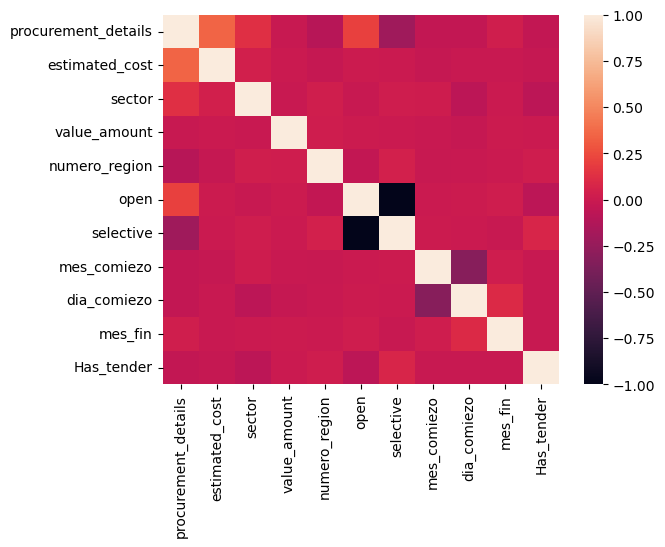

In [60]:
sns.heatmap(correlacion_21)

In [61]:
correlacion_18 = df__2018.corr()

<Axes: >

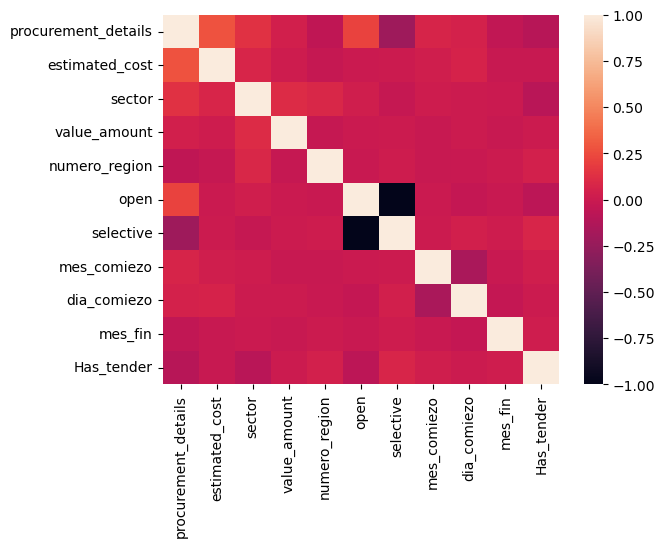

In [62]:
sns.heatmap(correlacion_18)

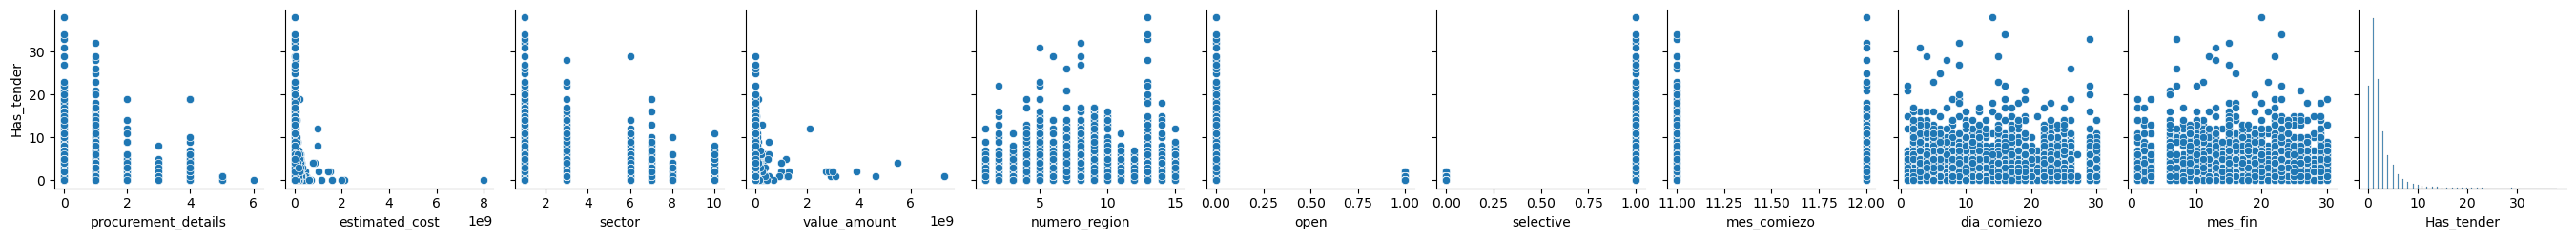

In [63]:
sns.pairplot(df__2021, y_vars="Has_tender")

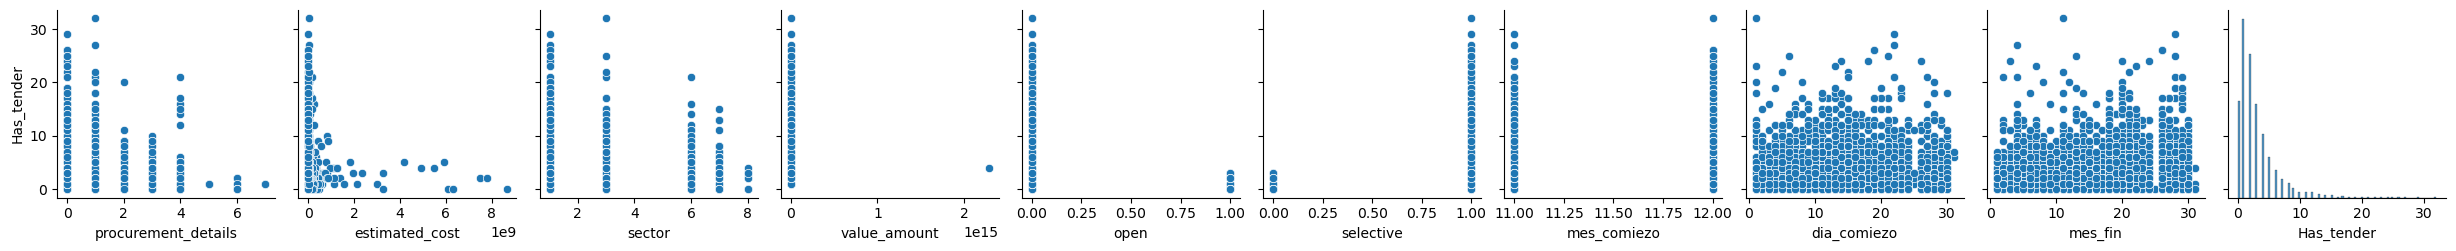

In [64]:
sns.pairplot(df__2018, y_vars="Has_tender")

Este gráfico representa la relación entre la variable Has_tender (cantidad de oferentes) y las siguientes columnas:

- Procurement Details: La mayoría de los valores se concentran en valores bajos de procurement_details por lo que no parece haber una fuerte correlación visible con la cantidad de oferentes.

- Estimated Cost: Hay una fuerte concentración de oferentes en licitaciones con costos estimados bajos, lo que sugiere que las licitaciones más accesibles pueden atraer a más oferentes, pero en el gráfico de correlacion general se puede observar que no es tan grande la relación

- Sector: Se observan diferentes niveles de participación en distintos sectores, lo que podría indicar que algunos sectores atraen más oferentes que otros (Esto lo podremos visualizar de mejor manera y a lujo de detalle en la pregunta 3).

- Procurement Method (open y selective): La mayoría de las licitaciones parecen ser del tipo open, lo cual es un factor relevante, ya que los métodos abiertos tienden a tener más oferentes (Reiteramos que esto lo vemos con mas detalle en la siguiente pregunta).

- Mes y Día de Inicio/Fin: La dispersión en estas variables no parece mostrar una relación clara, aunque hay que considerar que estamos analizando solo Noviembre y Diciembre.

En resumen, los factores más relevantes que parecen afectar la cantidad de oferentes son el costo estimado de la licitación y el método de adquisición (open vs. selective). Aunque gracias a la tabla de correlación vista anteriormente podemos concluir que si bien dentro del conjunto de columnas analizadas en este item se podría llegar a ver una relación, esta es MUY baja.

### Tercera Pregunta

Para responder esta pregunta se usara la información de tenderers, como valor de servicio estatal se utilizará la columna "sector" y como indicador de respuesta del mercado, la cantidad de tenderers "Has_tender" y la cantidad de suppliers "is_supplier" ,la cantidad de licitaciones del tipo selective en "procurementMethod" y el tipo en "procurement_details", puesto que según el reglamento de la ley 19886 articulo 10, las licitaciones de tipo privada/selective ocurren cuando no sepresentan concursantes al llamado de licitación pública/open, se utilizarán countplots y tablas de datos agrupados para cada valor a revisarse, se revisaran los valores para cada año, y se buscará establecer una generalidad para ambos, en caso de no ser posible se entregarán respuestas por cada año.

In [65]:
Pregunta3 = tenderer_2018[["sector", "Has_tender", "is_supplier", "procurementMethod", "procurement_details"]]

C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1382746147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_agrupados = Pregunta3.groupby('sector').agg({


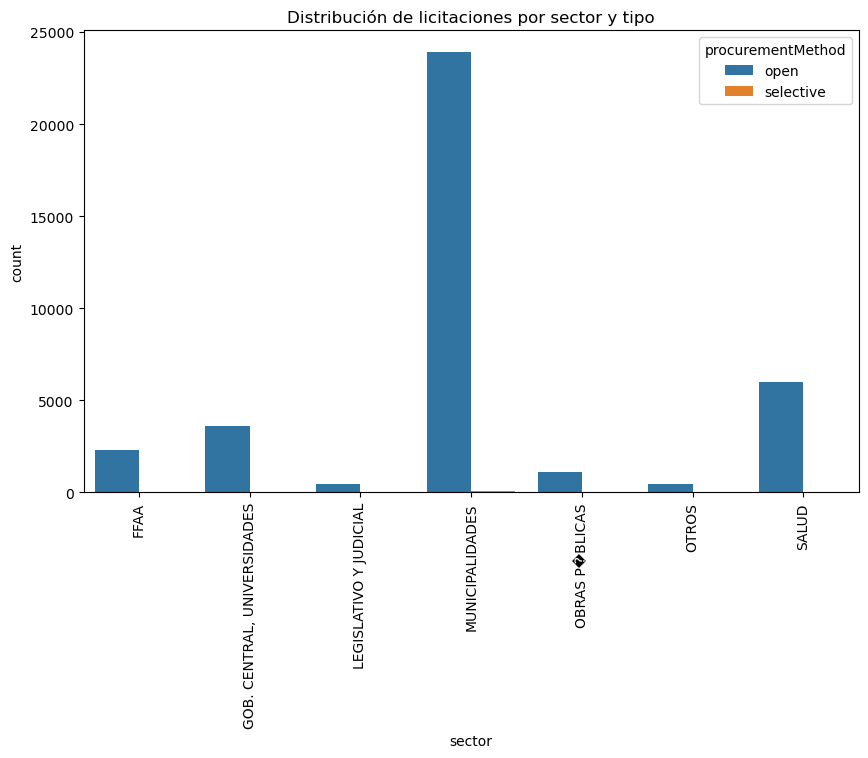


Resumen por sector:
                        sector  Has_tender  is_supplier  procurementMethod
0                         FFAA        2149          655                 23
1  GOB. CENTRAL, UNIVERSIDADES        3464         1055                 26
2       LEGISLATIVO Y JUDICIAL         440          129                  1
3              MUNICIPALIDADES       23110         5937                100
4               OBRAS P�BLICAS        1040          267                 13
5                        OTROS         436          106                  0
6                        SALUD        5771         1919                  9


In [66]:
datos_agrupados = Pregunta3.groupby('sector').agg({
    'Has_tender': 'sum',
    'is_supplier': 'sum',
    'procurementMethod': lambda x: (x == 'selective').sum()
}).reset_index()

plt.figure(figsize=(10, 6))
sns.countplot(data=Pregunta3, x='sector', hue='procurementMethod')
plt.title('Distribución de licitaciones por sector y tipo')
plt.xticks(rotation=90)
plt.show()

print("\nResumen por sector:")
print(datos_agrupados)

In [67]:
Pregunta3_mitad = tenderer_2021[["sector", "Has_tender", "is_supplier", "procurementMethod", "procurement_details"]]

C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1160112204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_agrupados = Pregunta3_mitad.groupby('sector').agg({


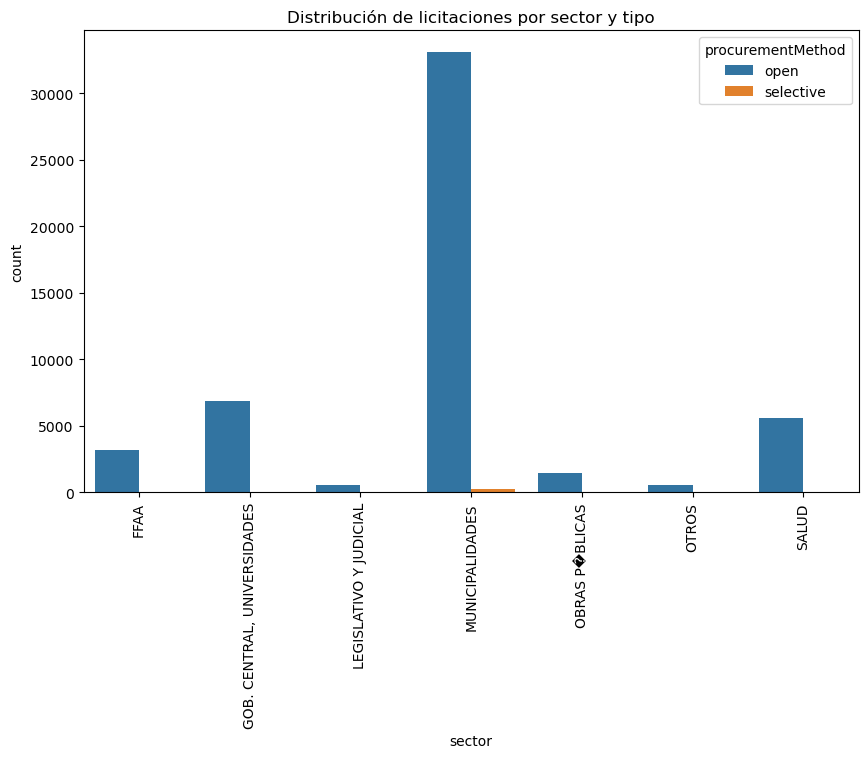


Resumen por sector:
                        sector  Has_tender  is_supplier  procurementMethod
0                         FFAA        2007            0                 13
1  GOB. CENTRAL, UNIVERSIDADES        4808            0                 26
2       LEGISLATIVO Y JUDICIAL         392            0                  3
3              MUNICIPALIDADES       23244            0                218
4               OBRAS P�BLICAS        1018            0                 32
5                        OTROS         466            0                  0
6                        SALUD        3672            0                 20


In [68]:
datos_agrupados = Pregunta3_mitad.groupby('sector').agg({
    'Has_tender': 'sum',
    'is_supplier': 'sum',
    'procurementMethod': lambda x: (x == 'selective').sum()
}).reset_index()

plt.figure(figsize=(10, 6))
sns.countplot(data=Pregunta3_mitad, x='sector', hue='procurementMethod')
plt.title('Distribución de licitaciones por sector y tipo')
plt.xticks(rotation=90)
plt.show()

print("\nResumen por sector:")
print(datos_agrupados)

Analisis de ambos años (2018 y 2021)

Como podemos observar, en los graficos, las municipalidades son el sector con la mayor cantidad de licitaciones (open), lo que sugiere una alta participación en este tipo de procesos relacionadas a las municipalidades y en comparación a los otros sectores.

Por otro lado, La mayoría de los sectores tienen muy pocas licitaciones del tipo (selective). Esto es debido a que las este tipo de licitaciones no se utiliza normalmente, ya que son casos muy particulares, en la que no se presentan oferentes de tipo (open), por lo que se tiene que utilizar un metodo mas selectivo. En conclusion, esto sugiere que generalmente no es necesario recurrir a este tipo de procedimiento.

Por ultimo, se puede observar que si bien los otros sectores tambien tienen una buena cantidad de licitaciones públicas (open), al compararlas con la cantidad de licitaciones municipales, se quedan cortos. Además si ya de por si el sector munucipal contenía pocas licitaciones selectivas (selective), los otros sectores al tener menos licitaciones, estp se nota con mayor claridad.

En conclusión:

Los gráficos sugieren que las municipalidades son el sector con la mejor respuesta del mercado, ya que tiene la mayor cantidad de licitaciones públicas (open), lo que implica que más tenderers participaron sin necesidad de recurrir a licitaciones selectivas ya que en ambos gráficos (años) las licitaciones del tipo selective son prácticamente inexistentes, lo que indica que la mayoría de los procesos son exitosos en la etapa de licitación pública (open), sin necesidad de recurrir a procesos privados.

### Cuarta Pregunta

Se utilizarán la columna "sector", para determinar el área estatal de cada licitación, "tender_tenderPeriod_startDate" para la fecha de inicio de la licitación y "value_amount" como monto, se utilizará groupby y counplots/barplots para revisar patrones, se buscará plantear una respuesta general para los años revisados, en caso de no ser posible se dará una respuesta para cada año y un contraste entre los patrones.

#### 2018

In [69]:
award_2018.head(7)

,_link_x,initiationType,tender_id,procurement_details,tender_status,procurementMethod,tender_hasEnquiries,tender_awardPeriod_endDate,tender_awardPeriod_startDate,tender_awardPeriod_durationInDays,...,value_monetary_unit,id,quantity,unit_name,unit_value_amount,classification_id,unit_value_monetary_unit,Nombre Segmento,Código Producto,Nombre Producto
0,id-0.0,tender,4548-142-L117,L1,complete,open,False,2017-12-15 18:05:00,2017-12-13 09:03:00,2.376389,...,CLP,36425198.0,1.0,Unidad,690000.0,60141012.0,CLP,"Instrumentos Musicales, Juegos, Juguetes, Arte...",60141012.0,Juguetes inflables
1,id-0.1,tender,2409-1129-L117,L1,unsuccessful,open,False,2018-01-25 11:35:00,2017-12-26 15:31:00,29.836111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id-0.2,tender,2961-811-L117,L1,complete,open,False,2018-02-02 19:38:00,2018-01-02 17:00:00,31.109722,...,CLP,36451829.0,1.0,Unidad,870000.0,30171501.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30171501.0,Puertas de cristal
3,id-0.3,tender,4858-195-L117,L1,unsuccessful,open,False,2017-12-26 15:53:00,2017-12-21 10:03:00,5.243056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id-0.4,tender,2409-975-LE17,LE,complete,open,True,2017-12-14 16:55:00,2017-12-11 16:30:00,3.017361,...,CLP,36342031.0,1.0,Unidad,6000000.0,86141501.0,CLP,Servicios Educativos y de Formación,86141501.0,Servicios de asesorías educativas
5,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460630.0,4.0,Unidad,4995.0,30102201.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30102201.0,Placa de aleación ferrosa
6,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460632.0,4.0,Kit,4538.0,49161604.0,CLP,"Equipos, Suministros y Accesorios para Deporte...",49161604.0,Pelotas de tenis


In [70]:
award_2018.columns

Index(['_link_x', 'initiationType', 'tender_id', 'procurement_details',
       'tender_status', 'procurementMethod', 'tender_hasEnquiries',
       'tender_awardPeriod_endDate', 'tender_awardPeriod_startDate',
       'tender_awardPeriod_durationInDays', 'tender_tenderPeriod_endDate',
       'tender_tenderPeriod_startDate', 'tender_tenderPeriod_durationInDays',
       'tender_enquiryPeriod_endDate', 'tender_enquiryPeriod_startDate',
       'tender_enquiryPeriod_durationInDays', 'estimated_cost',
       'estimated_cost_monetary_unit', 'buyer_id', 'buyer_name',
       'buyer_region', 'identifier_id', 'buyer_legalName', 'sector',
       'Codigo Unidad de Compra', 'Unidad de Compra', '_link_y',
       '_link_main_x', 'date', 'status', 'value_amount', 'value_monetary_unit',
       'id', 'quantity', 'unit_name', 'unit_value_amount', 'classification_id',
       'unit_value_monetary_unit', 'Nombre Segmento', 'Código Producto',
       'Nombre Producto'],
      dtype='object')

In [71]:
df_necesario_monto = award_2018[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto = df_necesario_monto.loc[df_necesario_monto['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto.drop_duplicates(keep="first", inplace=True)
df_necesario_monto.dropna(inplace=True)

In [72]:
df_sector_2018_monto_total = df_necesario_monto.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2018_monto_total.rename(columns={"value_amount": "amount_total_2018"}, inplace=True)

In [73]:
df_sector_2018_monto_media = df_necesario_monto.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2018_monto_media.rename(columns={"value_amount": "amount_2018_media"}, inplace=True)

In [74]:
df_necesario_monto_21 = award_2021[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto_21 = df_necesario_monto_21.loc[df_necesario_monto_21['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto_21.drop_duplicates(keep="first", inplace=True)
df_necesario_monto_21.dropna(inplace=True)

In [75]:
df_sector_2021_monto_total = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2021_monto_total.rename(columns={"value_amount": "amount_total_2021"}, inplace=True)

In [76]:
df_sector_2021_monto_media = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2021_monto_media.rename(columns={"value_amount": "amount_2021_media"}, inplace=True)

In [77]:
pd.options.display.float_format = '{:.2f}'.format

In [78]:
df_cant_sector_18 = award_2018[["tender_id","sector"]].merge(df_cant_tenderers_18, on="tender_id")
df_cant_sector_18.drop_duplicates(inplace=True)

In [79]:
df_cant_sector_21 = award_2021[["tender_id","sector"]].merge(df_cant_tenderers_21, on="tender_id")
df_cant_sector_21.drop_duplicates(inplace=True)

In [80]:
df_sector_2018_cant_total = df_cant_sector_18.groupby(by="sector").agg({"Has_tender":"sum"}).reset_index()
df_sector_2018_cant_total.rename(columns={"Has_tender": "cantidad_total_2018"}, inplace=True)
df_sector_2018_cant_media = df_cant_sector_18.groupby(by="sector").agg({"Has_tender":"mean"}).reset_index()
df_sector_2018_cant_media.rename(columns={"Has_tender": "cantidad_2018_media"}, inplace=True)

In [81]:
df_sector_2021_cant_total = df_cant_sector_21.groupby(by="sector").agg({"Has_tender":"sum"}).reset_index()
df_sector_2021_cant_total.rename(columns={"Has_tender": "cantidad_2021_total"}, inplace=True)
df_sector_2021_cant_media = df_cant_sector_21.groupby(by="sector").agg({"Has_tender":"mean"}).reset_index()
df_sector_2021_cant_media.rename(columns={"Has_tender": "cantidad_2021_media"}, inplace=True)

In [82]:
df_cant_sector_media = df_sector_2018_cant_media.merge(df_sector_2021_cant_media, on="sector")
df_cant_sector_total = df_sector_2018_cant_total.merge(df_sector_2021_cant_total, on="sector")
df_sector_cant = df_cant_sector_media.merge(df_cant_sector_total, on="sector")
df_sector_cant["cantidad_2021_media"] = df_sector_cant["cantidad_2021_media"].astype("float")
df_sector_cant["cantidad_2021_total"] = df_sector_cant["cantidad_2021_total"].astype("float")
df_sector_cant["cantidad_total_2018"] = df_sector_cant["cantidad_total_2018"].astype("float")
df_sector_cant["cantidad_2018_media"] = df_sector_cant["cantidad_2018_media"].astype("float")
df_sector_cant

,sector,cantidad_2018_media,cantidad_2021_media,cantidad_total_2018,cantidad_2021_total
0,FFAA,2.25,1.51,2149.00,2007.00
1,"GOB. CENTRAL, UNIVERSIDADES",2.55,2.12,3464.00,4808.00
2,LEGISLATIVO Y JUDICIAL,2.57,1.94,440.00,392.00
3,MUNICIPALIDADES,3.29,2.19,23110.00,23244.00
4,OBRAS P�BLICAS,2.83,1.79,1040.00,1018.00
5,OTROS,5.38,3.40,436.00,466.00
6,SALUD,3.79,2.58,5771.00,3672.00


In [83]:
df_monto_sector_media = df_sector_2018_monto_media.merge(df_sector_2021_monto_media, on="sector")
df_monto_sector_total = df_sector_2018_monto_total.merge(df_sector_2021_monto_total, on="sector")
df_sector_monto = df_monto_sector_media.merge(df_monto_sector_total, on="sector")
df_sector_monto["amount_2018_media"] = df_sector_monto["amount_2018_media"].astype("float")
df_sector_monto["amount_2021_media"] = df_sector_monto["amount_2021_media"].astype("float")
df_sector_monto["amount_total_2018"] = df_sector_monto["amount_total_2018"].astype("float")
df_sector_monto["amount_total_2021"] = df_sector_monto["amount_total_2021"].astype("float")
df_sector_monto

,sector,amount_2018_media,amount_2021_media,amount_total_2018,amount_total_2021
0,FFAA,7238542.54,24101849.15,3061903494.40,12822183749.83
1,"GOB. CENTRAL, UNIVERSIDADES",3215963050348.45,43638307.69,2286549728797747.00,41674583841.48
2,LEGISLATIVO Y JUDICIAL,21893918.16,8164356.34,1313635089.62,408217817.00
3,MUNICIPALIDADES,5699559.12,20726075.64,23373891942.25,79318691481.31
4,OBRAS P�BLICAS,91948055.56,25765741.57,16366753889.30,5359274246.62
5,OTROS,12146507.29,8826866.00,789522974.00,255979114.00
6,SALUD,23830703.10,34354966.06,21971908260.87,17658452555.62


C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1940608660.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1940608660.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1940608660.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1940608660.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtic

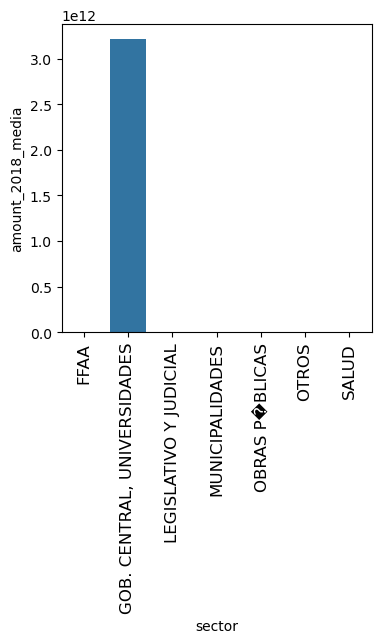

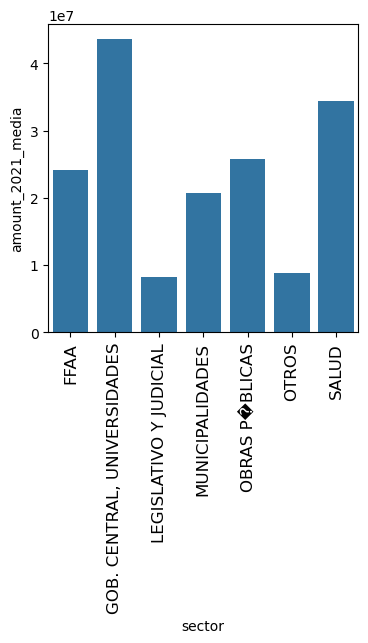

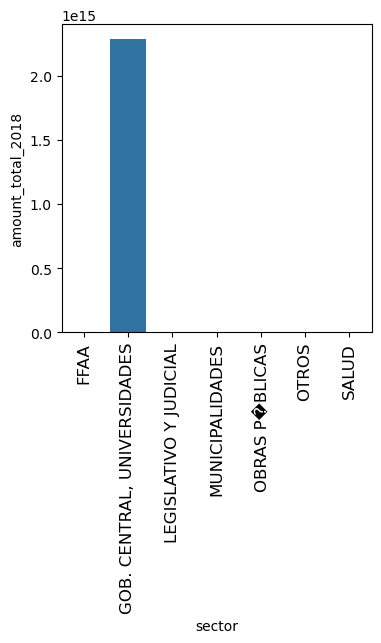

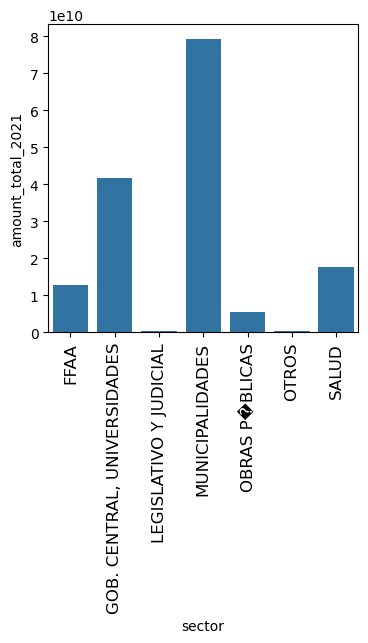

In [84]:
for columna in df_sector_monto.columns:
    if columna != "sector":
        plt.figure(figsize=(4, 4))
        ax = sns.barplot(df_sector_monto, x="sector", y=columna)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)


C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1948868584.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1948868584.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1948868584.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\1948868584.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtic

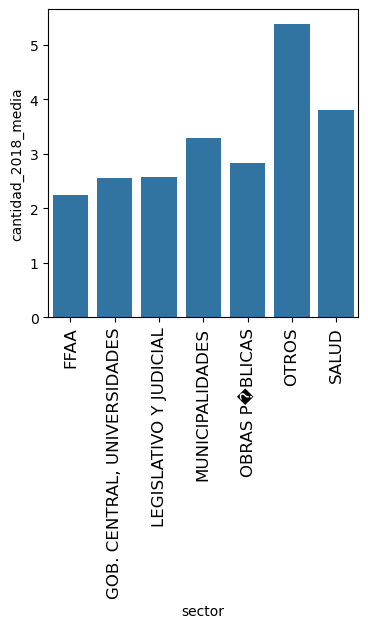

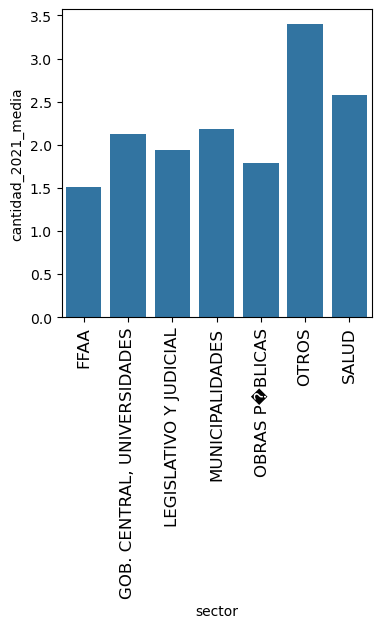

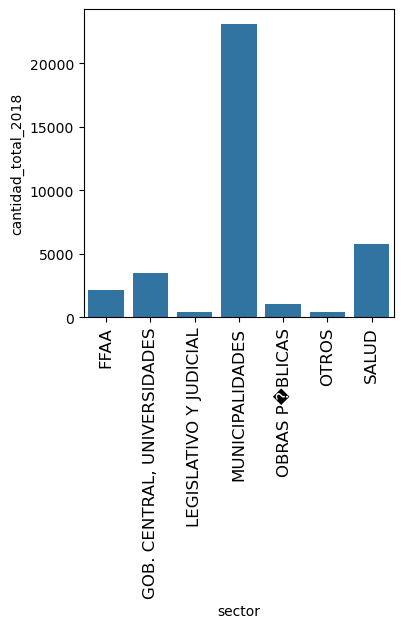

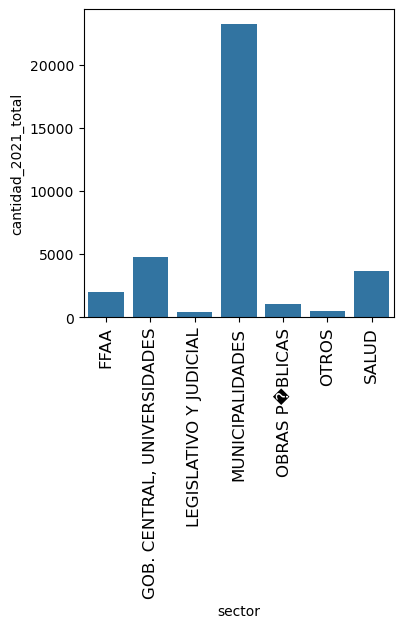

In [85]:
for columna in df_sector_cant.columns:
    if columna != "sector":
        plt.figure(figsize=(4, 4))
        ax = sns.barplot(df_sector_cant, x="sector", y=columna)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

#### Respuesta: se observa que en el mes utilizado del 2018 el monto de las de licitaciones realizadas por universidades es tan alto que no se pueden apreciar correctamente los valores de los otros sectores, mientras que en la información provista por el mes del 2021 nos permite observar que FFAA y Obras Públicas tienen similares medias, pero total ligeramente diferente, mientras que en cuestiones de cantidad de ofertas que resiven las licitaciones de cada sector, podemos ver que sus medias son sumamente parecidas, pero sus totales presentan una alta diferencia entre todos los sectores, en estos analisis podemos observar que no hay sectores con valores similares en todos los campos analizados, pero que en estadisticas especificas, si existen pares que se asemejan, pese a un cambio en los años. Esto se debe aque en gran parte a que los valores de cada sector en campos especificos parecen mantenerse cercanos a lñlos obtenidos en el otro año.

### Quinta pregunta

Se utilizarán datos de <https://www.bcn.cl/siit/mapas_vectoriales/index_html> para armar mapas de calor de la cantidad de licitaciones de los tipos presentes en <procurement_details> realizadas por región de Chile <buyer_region> según cada año y en conjunto.

In [86]:
import geopandas as gp

In [87]:
camino = path.join("Datos y trabajo con muestras", "regiones", "Regional.shp")
df_regiones = gp.read_file(camino, driver="SHP")

In [88]:
award_2018["procurement_details"].unique()

array(['L1', 'LE', 'LP', 'LR', 'LQ', nan, 'B2', 'H2', 'LS'], dtype=object)

In [89]:
award_2021["procurement_details"].unique()

array(['L1', 'LE', nan, 'LQ', 'LP', 'LR', 'B2', 'H2'], dtype=object)

In [90]:
award_2018["buyer_region"] = award_2018["buyer_region"].astype("string")

In [91]:
award_2018["buyer_region"].unique()

<StringArray>
[                           'Región de Valparaíso ',
                               'Región del Biobío ',
                 'Región Metropolitana de Santiago',
                             'Región de los Lagos ',
                     'Región de Arica y Parinacota',
           'Región de Magallanes y de la Antártica',
                                'Región del Maule ',
                               'Región de Los Ríos',
                          'Región de la Araucanía ',
 'Región del Libertador General Bernardo O´Higgins',
                               'Región de Atacama ',
                             'Región de Tarapacá  ',
 'Región Aysén del General Carlos Ibáñez del Campo',
                           'Región de Antofagasta ',
                              'Región de Coquimbo ',
                                               <NA>]
Length: 16, dtype: string

In [92]:
df_5_2018 = award_2018.dropna(subset=["procurement_details", "buyer_region"])
df_5_2021 = award_2021.dropna(subset=["procurement_details", "buyer_region"])
df_p5 = pd.concat([df_5_2018, df_5_2021])

In [93]:
df_L1 = df_p5.loc[df_p5["procurement_details"] == "L1"][["buyer_region"]]
df_L1["numero_region"] = df_L1["buyer_region"].map(dic_regiones)

df_LE = df_p5.loc[df_p5["procurement_details"] == "LE"][["buyer_region"]]
df_LE["numero_region"] = df_LE["buyer_region"].map(dic_regiones)

df_LP = df_p5.loc[df_p5["procurement_details"] == "LP"][["buyer_region"]]
df_LP["numero_region"] = df_LP["buyer_region"].map(dic_regiones)

df_LR = df_p5.loc[df_p5["procurement_details"] == "LR"][["buyer_region"]]
df_LR["numero_region"] = df_LR["buyer_region"].map(dic_regiones)

df_LQ = df_p5.loc[df_p5["procurement_details"] == "LQ"][["buyer_region"]]
df_LQ["numero_region"] = df_LQ["buyer_region"].map(dic_regiones)

df_B2 = df_p5.loc[df_p5["procurement_details"] == "B2"][["buyer_region"]]
df_B2["numero_region"] = df_B2["buyer_region"].map(dic_regiones)

df_H2 = df_p5.loc[df_p5["procurement_details"] == "H2"][["buyer_region"]]
df_H2["numero_region"] = df_H2["buyer_region"].map(dic_regiones)

df_LS = df_p5.loc[df_p5["procurement_details"] == "LS"][["buyer_region"]]
df_LS["numero_region"] = df_LS["buyer_region"].map(dic_regiones)

In [94]:
l1_reg = df_L1.groupby("numero_region").count().reset_index()
le_reg = df_LE.groupby("numero_region").count().reset_index()
lp_reg = df_LP.groupby("numero_region").count().reset_index()
lr_reg = df_LR.groupby("numero_region").count().reset_index()
lq_reg = df_LQ.groupby("numero_region").count().reset_index()
b2_reg = df_B2.groupby("numero_region").count().reset_index()
h2_reg= df_H2.groupby("numero_region").count().reset_index()
ls_reg= df_LS.groupby("numero_region").count().reset_index()

In [95]:
L1 = df_regiones.merge(l1_reg, right_on="numero_region", left_on="codregion", how="left")
LE= df_regiones.merge(le_reg, right_on="numero_region", left_on="codregion", how="left")
LP= df_regiones.merge(lp_reg, right_on="numero_region", left_on="codregion", how="left")
LR= df_regiones.merge(lr_reg, right_on="numero_region", left_on="codregion", how="left")
LQ = df_regiones.merge(lq_reg, right_on="numero_region", left_on="codregion", how="left")
B2= df_regiones.merge(b2_reg, right_on="numero_region", left_on="codregion", how="left")
H2= df_regiones.merge(h2_reg, right_on="numero_region", left_on="codregion", how="left")
LS = df_regiones.merge(ls_reg, right_on="numero_region", left_on="codregion", how="left")

<Axes: >

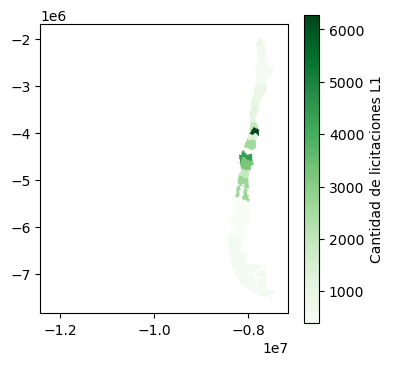

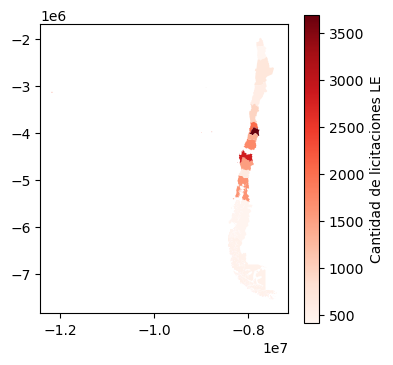

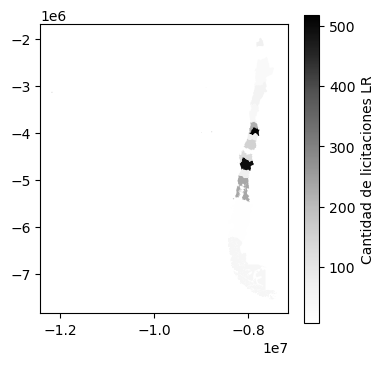

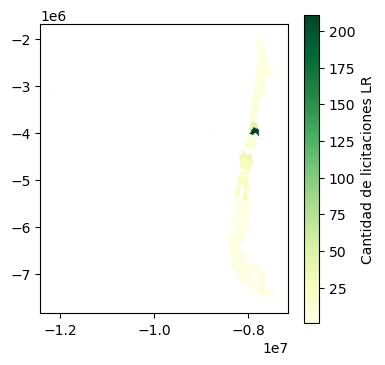

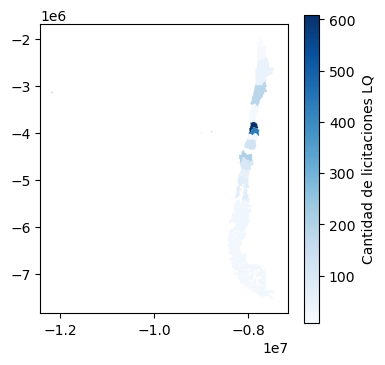

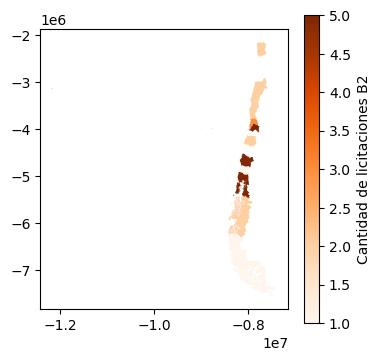

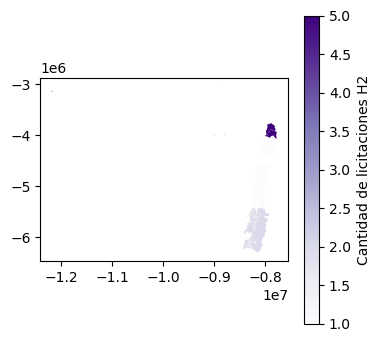

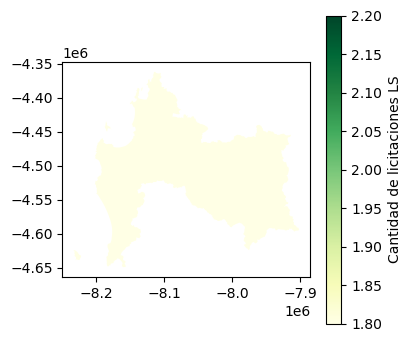

In [96]:

L1 = L1.set_index("objectid")
L1.plot(figsize=(4,4), column='buyer_region', cmap='Greens', legend=True, legend_kwds={"label": "Cantidad de licitaciones L1"})
LE = LE.set_index("objectid")
LE.plot(figsize=(4,4), column='buyer_region', cmap='Reds', legend=True,legend_kwds={"label": "Cantidad de licitaciones LE"})
LP = LP.set_index("objectid")
LP.plot(figsize=(4,4), column='buyer_region', cmap='Grays', legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LR = LR.set_index("objectid")
LR.plot(figsize=(4,4), column='buyer_region', cmap="YlGn", legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LQ = LQ.set_index("objectid")
LQ.plot(figsize=(4,4), column='buyer_region', cmap='Blues', legend=True, legend_kwds={"label": "Cantidad de licitaciones LQ"})
B2 = B2.set_index("objectid")
B2.plot(figsize=(4,4), column='buyer_region', cmap='Oranges', legend=True, legend_kwds={"label": "Cantidad de licitaciones B2"})
H2 = H2.set_index("objectid")
H2.plot(figsize=(4,4), column='buyer_region', cmap='Purples', legend=True, legend_kwds={"label": "Cantidad de licitaciones H2"})
LS = LS.set_index("objectid")
LS.plot(figsize=(4,4), column='buyer_region', cmap='YlGn', legend=True, legend_kwds={"label": "Cantidad de licitaciones LS"})


C:\Users\ReToxi\AppData\Local\Temp\ipykernel_5664\2377871146.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)


[Text(0, 0, 'Región de Valparaíso '),
 Text(1, 0, 'Región del Biobío '),
 Text(2, 0, 'Región Metropolitana de Santiago'),
 Text(3, 0, 'Región de los Lagos '),
 Text(4, 0, 'Región de Arica y Parinacota'),
 Text(5, 0, 'Región de Magallanes y de la Antártica'),
 Text(6, 0, 'Región del Maule '),
 Text(7, 0, 'Región de Los Ríos'),
 Text(8, 0, 'Región de la Araucanía '),
 Text(9, 0, 'Región del Libertador General Bernardo O´Higgins'),
 Text(10, 0, 'Región de Atacama '),
 Text(11, 0, 'Región de Tarapacá  '),
 Text(12, 0, 'Región Aysén del General Carlos Ibáñez del Campo'),
 Text(13, 0, 'Región de Antofagasta '),
 Text(14, 0, 'Región de Coquimbo '),
 Text(15, 0, 'Región del Ñuble')]

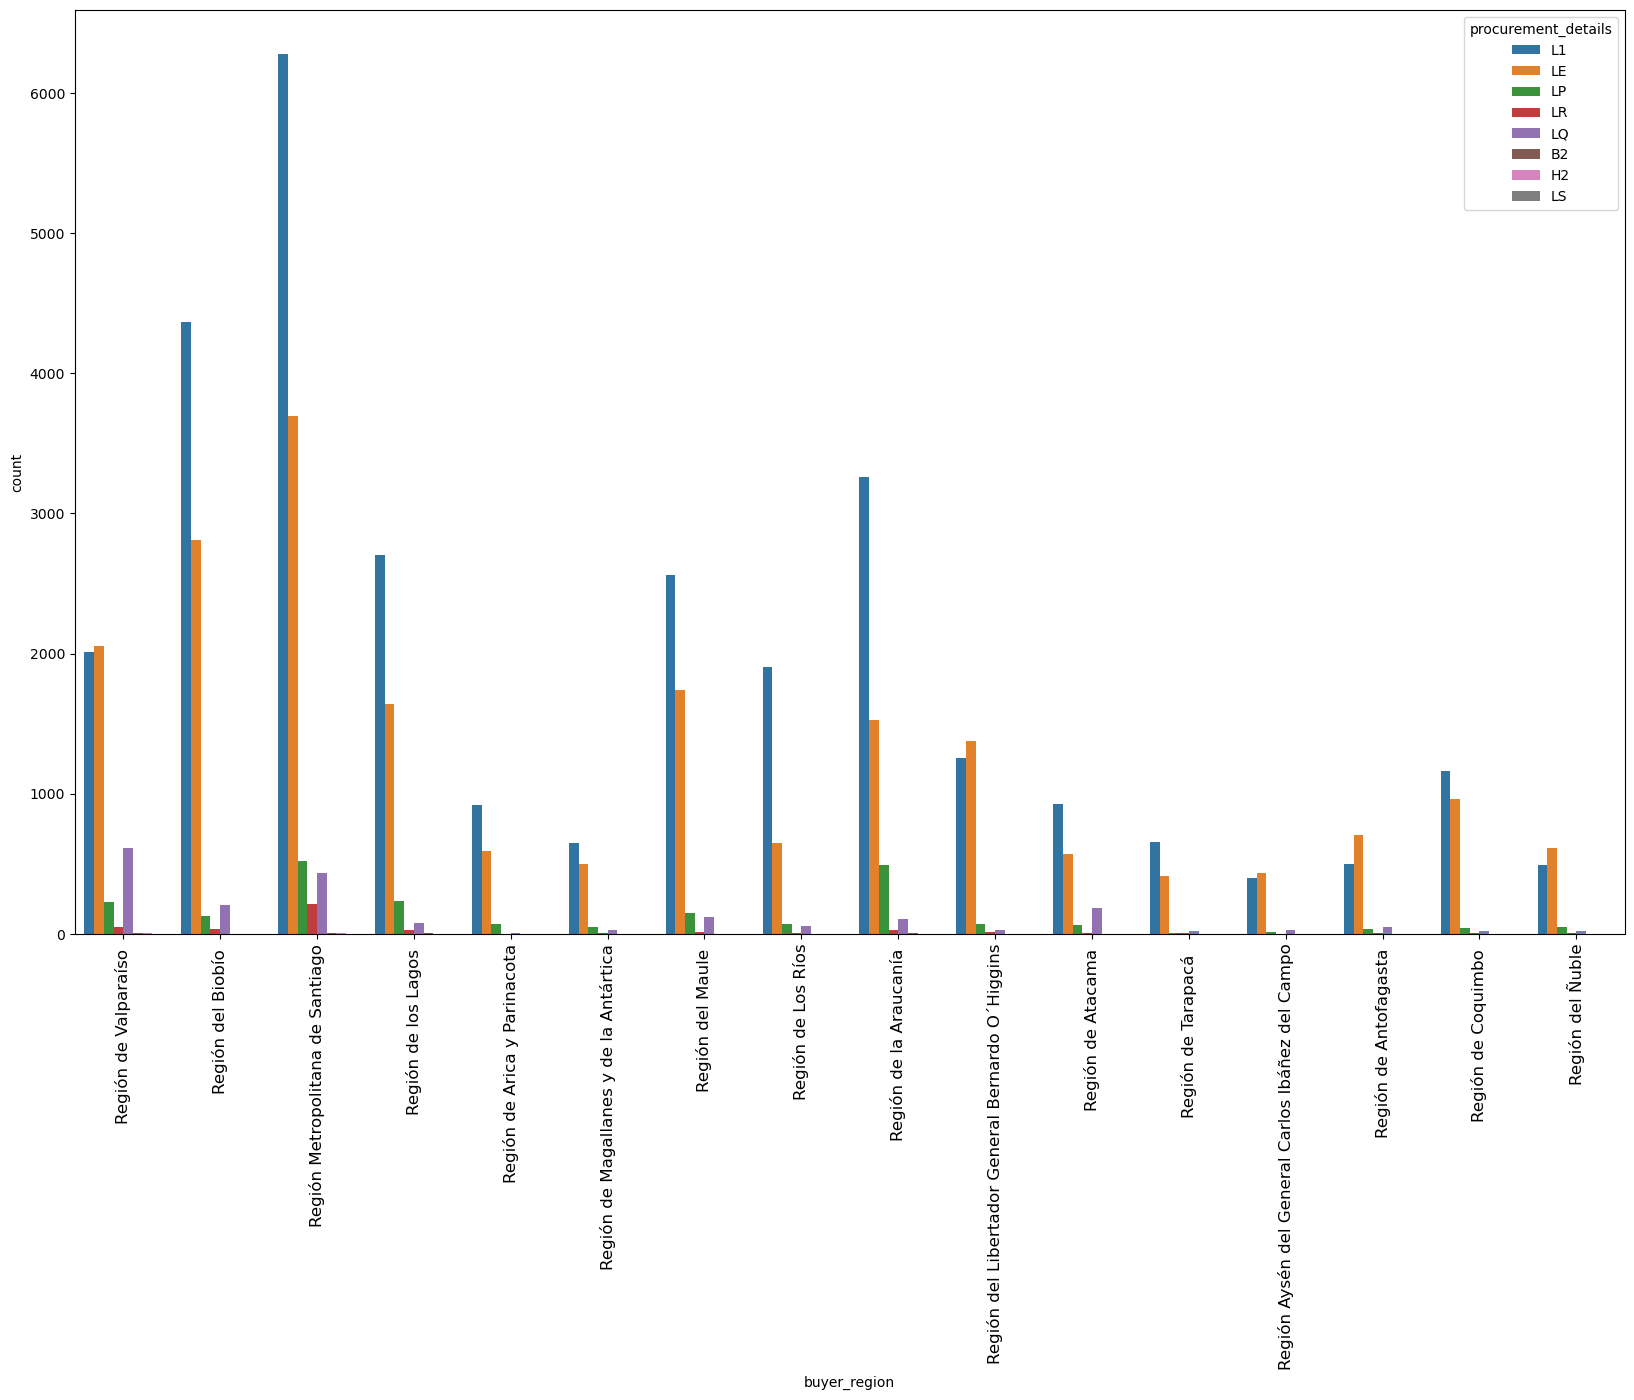

In [97]:
plt.figure(figsize=(20, 12))
ax = sns.countplot(df_p5, x="buyer_region", hue="procurement_details") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)


#### Podemos observar en los heatmaps y en el grafico que todas los tipos de licitaciones tienen mayor concentración en la región metropolitana, con excepción de LQ Licitación Pública entre a 2000 y 5000 UTM que es tiene mayor cantidad de ocurrencias en la región de Valparaiso, aparte podemos notar que a menor cantidad de ocurrencias de un tipo de licitación, la magnitud de la diferencia entre la región de mayor concentración disminuye. Estos resultados nos permiten plantear por hipotesis, que la Región Metropolitana es el lugar geografico en el que se concentra las actividades de estado o se encuentran la mayor cantidad de instituciones gubernamentales.